###### chi2 distribution

Ryan Reece <https://github.com/rreece>        
created: 2025-01-26

In [1]:
import math
import numpy as np

import hepplot as hep

## Cochran's theorem

$$ \frac{n \, \hat{\sigma}^2}{\sigma^2} \sim \chi^{2}_{n-1} $$

where the MLEs for a normal distribution are

$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

and

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} ( x_i - \hat{\mu} )^2  $$

See Wikipedia: [Cochran's theorem](https://en.wikipedia.org/wiki/Cochran%27s_theorem#Estimation_of_variance).

Note the unbiased sample variance is

$$ s^2 = \frac{1}{(n-1)} \sum_{i=1}^{n} ( x_i - \hat{\mu} )^2  $$

So

$$ s^2 = \frac{n}{(n-1)} \, \hat{\sigma}^2 $$

and

$$ \frac{(n-1) \, s^2}{\sigma^2} \sim \chi^{2}_{n-1} $$


TODO:

-   Quantiles of $\chi^2 \Rightarrow$ $p$-values [Table](https://math.arizona.edu/~jwatkins/chi-square-table.pdf)
-   Multivariate case


## 1-d Gaussian

In [2]:
mu = 80
sigma = 10
n_times = 10

In [3]:
bins =  list(range(n_times+1))
y = [mu]*n_times
data = [ np.random.normal(loc=mu, scale=sigma) for _ in range(n_times) ]

(<Figure size 1000x1000 with 1 Axes>, [<AxesSubplot: >])

<Figure size 1000x1000 with 0 Axes>

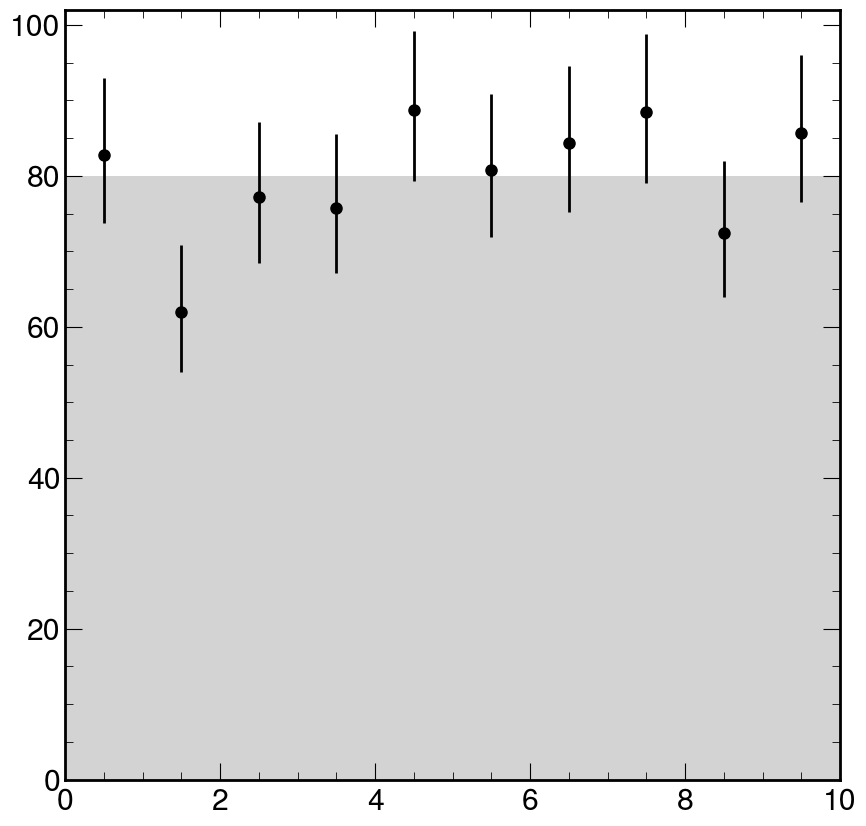

In [4]:
hep.plot.hist1d(bins, y, data=data)

In [5]:
np.sqrt(np.var(data, ddof=1))

8.271967777113849

## Calculate chi2 statistic

In [6]:
mu_hat = np.mean(data)

In [7]:
s2 = np.var(data, ddof=1)

In [8]:
z = sum( [ ((_x - mu_hat)**2)/(s2) for _i, _x in enumerate(data) ] )

In [9]:
z

9.000000000000002

## Monte Carlo chi2

In [10]:
def do_experiment():
    data = [ np.random.normal(loc=mu, scale=sigma) for _ in range(n_times) ]
#    mu_hat = np.mean(data)
#    s2 = np.var(data, ddof=1)  ## THIS IS CHEATING
#    z = sum( [ ((_x - mu_hat)**2)/(s2) for _i, _x in enumerate(data) ] )
    z = sum( [ ((_x - mu)**2)/(sigma**2) for _i, _x in enumerate(data) ] )
    return z

In [11]:
n_trials = 1000
n_chi2_bins = 30
results = [ do_experiment() for _ in range(n_trials) ]

In [12]:
#z = [ _r[3] for _r in results ]
z = results

In [13]:
chi2_bins = list(range(n_chi2_bins))

In [14]:
y = np.histogram(z, bins=chi2_bins)[0]

<Figure size 1000x1000 with 0 Axes>

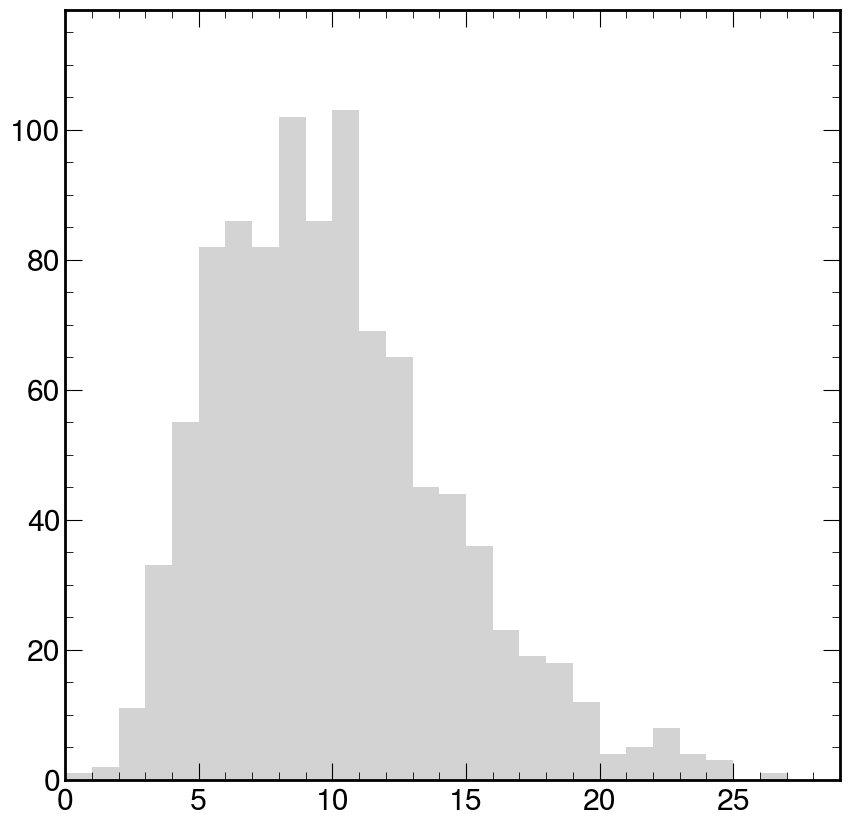

In [15]:
fig, axes = hep.plot.hist1d(bins=chi2_bins, y=y)

In [16]:
from scipy.stats import chi2
x = np.linspace(0, n_chi2_bins, 100)
dof = 10

In [17]:
axes[0].plot(x, n_trials*chi2.pdf(x, dof), label=f'dof={dof}')

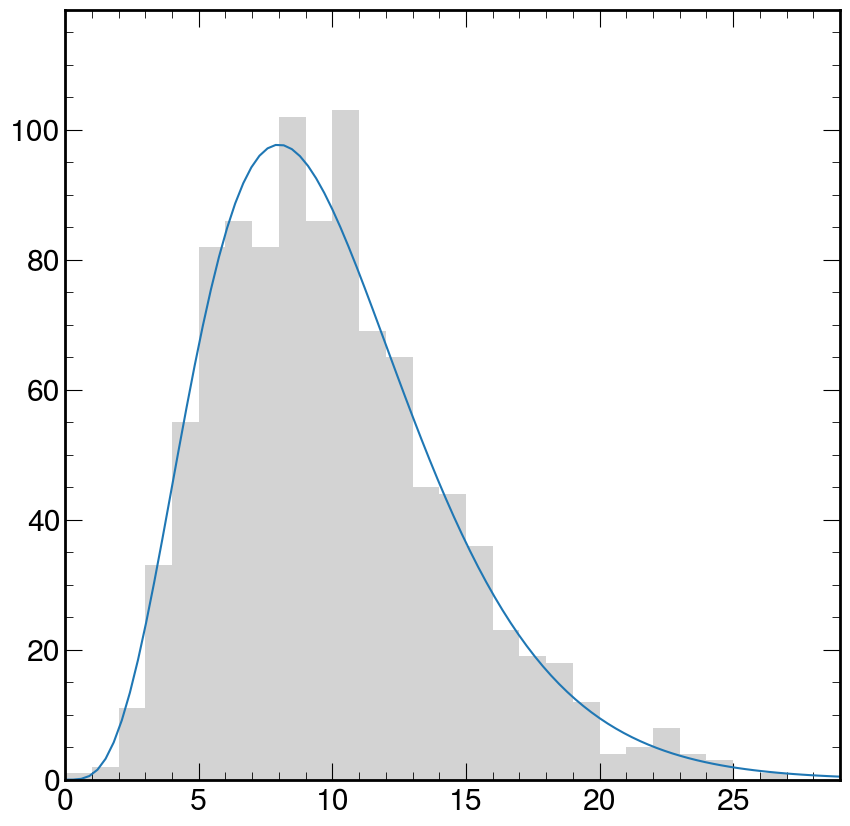

In [18]:
fig

## Quantiles to p-values

Cumulative distribution function:

$$ F(y) = \int_{-\infty}^{y} f(x) \, dx $$

$$ \bar{F}(y) = 1 - F(y) = \int_{y}^{\infty} f(x) \, dx $$

$p$-value from test statistic $q$:

$$ p = 1 - \alpha = \int_{-\infty}^{q_{\alpha}} f(q) \, dq = F(q(\alpha))$$

Critical value of test statistic for a given $p$-value:

$$ q_{\alpha} = F^{-1}(1 - \alpha) = \mathrm{ppf}(1 - \alpha) $$

Two sided:

$$ 1 - \alpha = \int_{q_{\alpha}^\mathrm{lower}}^{q_{\alpha}^\mathrm{upper}} f(q) \, dq $$

$$ 1 - \frac{\alpha}{2} = \int_{-\infty}^{q_{\alpha}^\mathrm{upper}} f(q) \, dq = F(q_{\alpha}^\mathrm{upper}) $$

$$ 1 - \frac{\alpha}{2} = \int_{q_{\alpha}^\mathrm{lower}}^{\infty} f(q) \, dq = \bar{F}(q_{\alpha}^\mathrm{lower}) = 1 - F(q_{\alpha}^\mathrm{lower}) $$

$$ q_{\alpha}^\mathrm{upper} = F^{-1}(1 - \frac{\alpha}{2}) = \mathrm{ppf}(1 - \frac{\alpha}{2}) $$

$$ q_{\alpha}^\mathrm{lower} = F^{-1}(\frac{\alpha}{2}) = \mathrm{ppf}(\frac{\alpha}{2}) $$

In [19]:
def calc_critical_stat(dist, dof, alpha):
    chi2_alpha = dist.ppf(1-alpha, dof)
    return chi2_alpha

def calc_p_value(dist, dof, test_stat):
    p_value = 1.0 - dist.cdf(test_stat, dof)
    return p_value

In [20]:
alpha = 0.05
chi2_alpha = calc_critical_stat(chi2, dof, alpha)
chi2_alpha

18.307038053275146

In [21]:
calc_p_value(chi2, dof, chi2_alpha)

0.050000000000000044

In [22]:
calc_p_value(chi2, dof, 20.)

0.02925268807696113

In [23]:
# TODO: coverage study

## Wishart distribution

Scatter matrix:

$$ S = \sum_{i=1}^{n} ( x_i - \bar{x} ) ( x_i - \bar{x} )^\intercal   $$

If $X \sim N_{p}(0, V)$ then $S \sim W_{p}(V, n)$.

If $X \sim N_{p}(\mu, V)$ then $S \sim W_{p}(V, n-1)$.

If $p=1$ and $V=1$, then Wishart is $\chi^{2}_{n}$.

$$ W_{1}(1, n) = \chi^{2}_{n} $$

Variance of Wishart:

$$ n \, ( V_{ii} V_{jj} + V_{ij}^{2} ) $$

Unbiased estimator of variance of scatter matrix:

$$ \mathrm{Var}(\hat{S}) = (n-1) ( V_{ii} V_{jj} + V_{ij}^{2} ) $$

Covariance matrix:

$$ V = \frac{1}{n-1} S $$

Variance of covariance matrix:

$$ \mathrm{Var}(\hat{V}) = \frac{1}{(n-1)^2} \mathrm{Var}(\hat{S}) = \frac{1}{n-1} ( \hat{V}_{ii} \hat{V}_{jj} + \hat{V}_{ij}^{2} ) $$

Asymptotically assuming the errors are normally distributed:

$$ \hat{\sigma}_{ij} = \sqrt{\frac{1}{n-1} ( \hat{V}_{ii} \hat{V}_{jj} + \hat{V}_{ij}^{2} )} $$

and we have a frequentist confidence interval:

$$ V_{ij} = \hat{V}_{ij} \pm z_{\alpha} \, \hat{\sigma}_{ij} $$

at a confidence level picked by the two-sided $z$ score:

$$ z_{\alpha} = \Phi^{-1}\left(1 - \frac{\alpha}{2}\right) $$

because

$$ \Phi(z) = \int_{-\infty}^{z} \phi(x) \, dx  = 1 - \frac{\alpha}{2} $$

where

$$ \phi(x) = \frac{1}{\sqrt{2\pi}} e^{x^2/2} $$

The one-sided formula is

$$ \Phi(z) = \int_{-\infty}^{z} \phi(x) \, dx  = 1 - \alpha $$

Thinking that instead of using quantiles of the normal distribution we could use the quantiles of the Wishart distribution more directly.

$$ V_{ij} = \hat{V}_{ij} \pm \Delta_{ij}^{\alpha} $$

where $\Delta_{ij}^{\alpha}$ are quantiles of the Wishart distribution.

$$ 1 - \frac{\alpha}{2} = F_{W}(\Delta_{ij}^{\alpha}; \hat{V}_{ij}) $$

$$ \Delta_{ij}^{\alpha} = F_{W}^{-1}(1 - \frac{\alpha}{2}; \hat{V}_{ij}) $$

In [24]:
from scipy.stats import wishart

In [25]:
x = np.linspace(1e-5, 8, 100)

In [26]:
axes[0].plot(x, n_trials*wishart.pdf(x, df=dof, scale=1), label=f'dof={dof}')

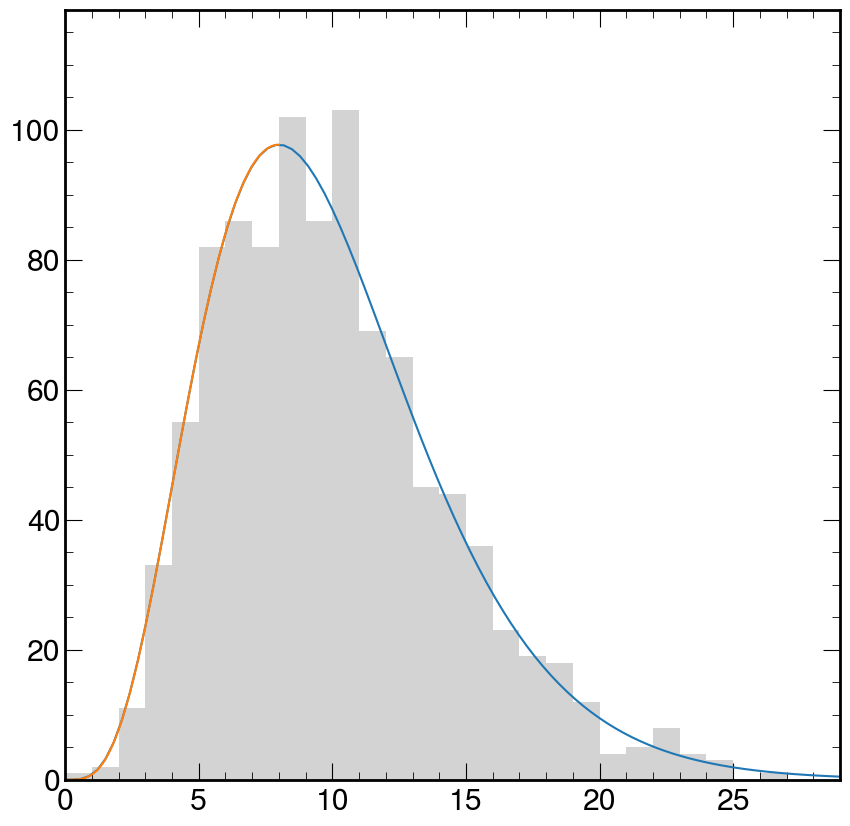

In [27]:
fig

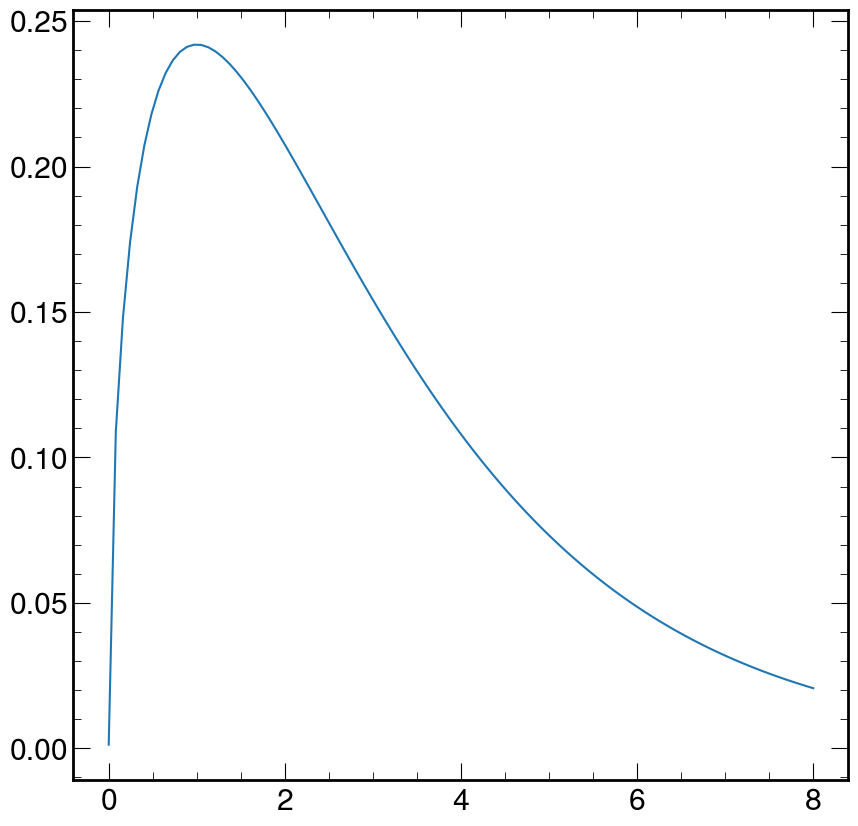

In [28]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wishart.html
import matplotlib.pyplot as plt

x = np.linspace(1e-5, 8, 100)
w = wishart.pdf(x, df=3, scale=1)
c = chi2.pdf(x, 3)
plt.plot(x, w)
plt.show()

In [29]:
w[:5]

array([0.00126156, 0.10892176, 0.14793434, 0.17400548, 0.1929669 ])

In [30]:
c[:5]

array([0.00126156, 0.10892176, 0.14793434, 0.17400548, 0.1929669 ])

In [31]:
wishart.pdf(1, df=3, scale=1)

0.24197072451914337

In [35]:
chi2.ppf(1-alpha, df=3)

7.814727903251179